<a href="https://colab.research.google.com/github/gxilly/BasicProg_DataViz65/blob/main/Fianal_exam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้

#นำเข้าข้อมูลและเตรียมข้อมูล

In [88]:
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib

In [89]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/BPDVfinal')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/BPDVfinal


In [91]:
!ls

คะแนนอาจารย์ที่ปรึกษา_renamed.csv
คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.csv
คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx
คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx


In [92]:
# open file
day1 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day1 = day1.iloc[1:]
print(day1.shape) # shown number of (row, column)
day1.head()

(54, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58
5,NaN,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52


In [93]:
day1_1= day1.fillna(method='ffill')
day1_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52


In [94]:
all_aj_list1 = set(list(day1_1['กรรมการสอบ'].dropna()))
all_aj_list1

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [95]:
day1_1['คะแนนรวม 40%'] = (40*day1_1[['รวม']]/70)

In [157]:
day1_1.isnull().any()

ห้องสอบ                                          False
เวลา                                             False
ชื่อเรื่อง                                       False
นักศึกษา                                         False
อาจารย์                                          False
กรรมการสอบ                                       False
ความชัดเจนของโจทย์การวิจัย                       False
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    False
ความถูกต้องของระเบียบวิธีวิจัย                   False
สื่อการนำเสนอ                                    False
ความสามารถในการนำเสนอและตอบคำถาม                 False
ความถูกต้องของเนื้อหาในเล่มรายงาน                False
รวม                                              False
คะแนนรวม 40%                                     False
dtype: bool

In [96]:
day2 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day2 = day2.iloc[1:]
print(day2.shape) # shown number of (row, column)
day2.head()

(52, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60
5,NaN,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58


In [97]:
day2_1 = day2.fillna(method='ffill')
day2_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
5,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58


In [98]:
all_aj_list2 = set(list(day2_1['กรรมการสอบ'].dropna()))
all_aj_list2

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [99]:
day2_1['คะแนนรวม 40%'] = (40*day2_1[['รวม']]/70)

In [158]:
day2_1.isnull().any()

ห้องสอบ                                          False
เวลา                                             False
ชื่อเรื่อง                                       False
นักศึกษา                                         False
อาจารย์                                          False
กรรมการสอบ                                       False
ความชัดเจนของโจทย์การวิจัย                       False
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    False
ความถูกต้องของระเบียบวิธีวิจัย                   False
สื่อการนำเสนอ                                    False
ความสามารถในการนำเสนอและตอบคำถาม                 False
ความถูกต้องของเนื้อหาในเล่มรายงาน                False
รวม                                              False
คะแนนรวม 40%                                     False
dtype: bool

In [100]:
day3 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day3 = day3[1:]
print(day2.shape) # shown number of (row, column)
day3.head()

(52, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57
5,NaN,NaN,NaN,ugly-harlequin-octopus,NaN,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59


In [101]:
day3_1 = day3.fillna(method='ffill')
day3_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
5,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59


In [102]:
all_aj_list3 = set(list(day3_1['กรรมการสอบ'].dropna()))
all_aj_list3

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [103]:
day3_1['คะแนนรวม 40%'] = (40*day3_1[['รวม']]/70)

In [159]:
day3_1.isnull().any()

ห้องสอบ                                          False
เวลา                                             False
ชื่อเรื่อง                                       False
นักศึกษา                                         False
อาจารย์                                          False
กรรมการสอบ                                       False
ความชัดเจนของโจทย์การวิจัย                       False
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    False
ความถูกต้องของระเบียบวิธีวิจัย                   False
สื่อการนำเสนอ                                    False
ความสามารถในการนำเสนอและตอบคำถาม                 False
ความถูกต้องของเนื้อหาในเล่มรายงาน                False
รวม                                              False
คะแนนรวม 40%                                     False
dtype: bool

In [104]:
# open file
tpt = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=0,skiprows=1)
tpt = tpt.iloc[1:]
print(tpt.shape) 
tpt.head()

(8, 13)


,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...


In [105]:
tpt = tpt.fillna(method='ffill')
tpt.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...


In [106]:
tpt['คะแนนรวม 60%'] = (60*tpt[['รวม']]/70)

In [107]:
tdd = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=1,skiprows=1)
tdd = tdd.iloc[1:]
print(tdd.shape) # shown number of (row, column)

(6, 13)


In [108]:
tdd = tdd.fillna(method='ffill')

In [109]:
tdd['คะแนนรวม 60%'] = (60*tdd[['รวม']]/70)

In [110]:
sky = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=2,skiprows=1)
sky = sky.iloc[1:]
print(sky.shape) # shown number of (row, column)

(6, 13)


In [111]:
sky = sky.fillna(method='ffill')

In [112]:
sky['คะแนนรวม 60%'] = (60*sky[['รวม']]/70)

In [113]:
tnp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=3,skiprows=1)
tnp = tnp.iloc[1:]
print(tnp.shape) # shown number of (row, column)

(7, 13)


In [114]:
tnp = tnp.fillna(method='ffill')

In [115]:
tnp['คะแนนรวม 60%'] = (60*tnp[['รวม']]/70)

In [116]:
wtc = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=4,skiprows=1)
wtc = wtc.iloc[1:]
print(wtc.shape) # shown number of (row, column)

(5, 13)


In [117]:
wtc = wtc.fillna(method='ffill')

In [118]:
wtc['คะแนนรวม 60%'] = (60*wtc[['รวม']]/70)

In [119]:
spn = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=5,skiprows=1)
spn = spn.iloc[1:]
print(spn.shape) # shown number of (row, column)

(8, 13)


In [120]:
spn = spn.fillna(method='ffill')

In [121]:
spn['คะแนนรวม 60%'] = (60*spn[['รวม']]/70)

In [122]:
ypp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=6,skiprows=1)
ypp = ypp.iloc[1:]
print(ypp.shape) # shown number of (row, column)

(6, 13)


In [123]:
ypp = ypp.fillna(method='ffill')

In [124]:
ypp['คะแนนรวม 60%'] = (60*ypp[['รวม']]/70)

In [125]:
plk = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=7,skiprows=1)
plk = plk.iloc[1:]
print(plk.shape) # shown number of (row, column)

(6, 13)


In [126]:
plk = plk.fillna(method='ffill')

In [127]:
plk['คะแนนรวม 60%'] = (60*plk[['รวม']]/70)

In [128]:
wcd = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=8,skiprows=1)
wcd = wcd.iloc[1:]
print(wcd.shape) # shown number of (row, column)

(9, 13)


In [129]:
wcd = wcd.fillna(method='ffill')

In [130]:
wcd['คะแนนรวม 60%'] = (60*wcd[['รวม']]/70)

In [131]:
wnp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=9,skiprows=1)
wnp = wnp.iloc[1:]
print(wnp.shape) # shown number of (row, column)

(5, 13)


In [132]:
wnp = wnp.fillna(method='ffill')

In [133]:
wnp['คะแนนรวม 60%'] = (60*wnp[['รวม']]/70)

In [134]:
typ = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=10,skiprows=1)
typ  = typ.iloc[1:]
print(typ.shape) # shown number of (row, column)

(8, 13)


In [135]:
typ = typ.fillna(method='ffill')

In [136]:
typ['คะแนนรวม 60%'] = (60*typ[['รวม']]/70)

In [137]:
utp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=11,skiprows=1)
utp  = utp.iloc[1:]
print(utp.shape) # shown number of (row, column)

(6, 13)


In [138]:
utp = utp.fillna(method='ffill')

In [139]:
utp['คะแนนรวม 60%'] = (60*utp[['รวม']]/70)

# 1.คะแนนประกอบด้วย 2 ส่วน
- คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

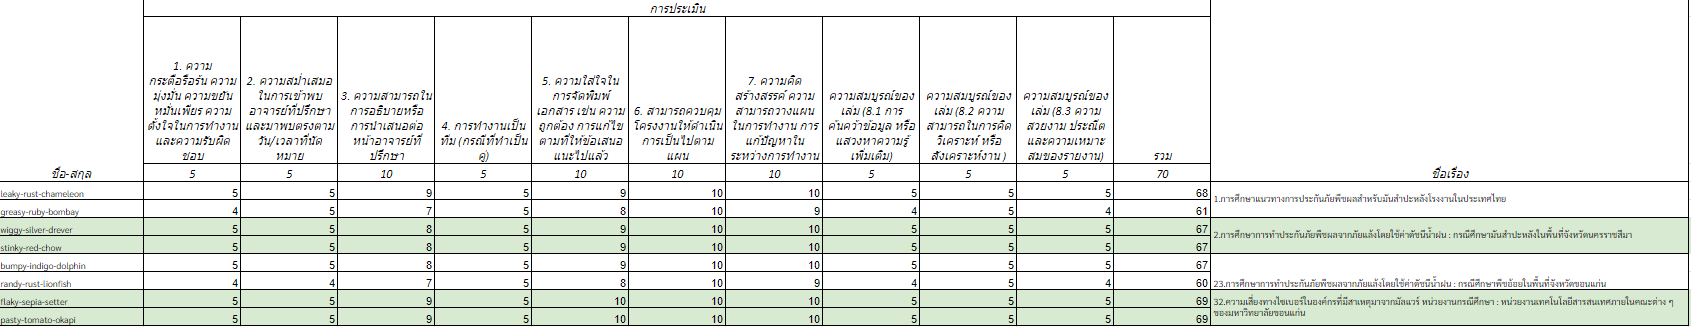

In [207]:
dayy = pd.concat([day1_1,day2_1,day3_1] , axis=0)

In [208]:
day = dayy.groupby('นักศึกษา')['คะแนนรวม 40%'].mean().reset_index()
day

,นักศึกษา,คะแนนรวม 40%
0,boozy-thistle-wildebeest,32.857143
1,breezy-pear-macaw,32.000000
2,bumpy-indigo-dolphin,30.571429
3,chewy-lilac-shark,31.714286
4,chewy-persimmon-catfish,27.142857
...,...,...
75,ugly-harlequin-octopus,33.142857
76,ugly-myrtle-walrus,27.142857
77,whiny-peach-audemer,27.714286
78,whiny-pear-otter,33.142857


- คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

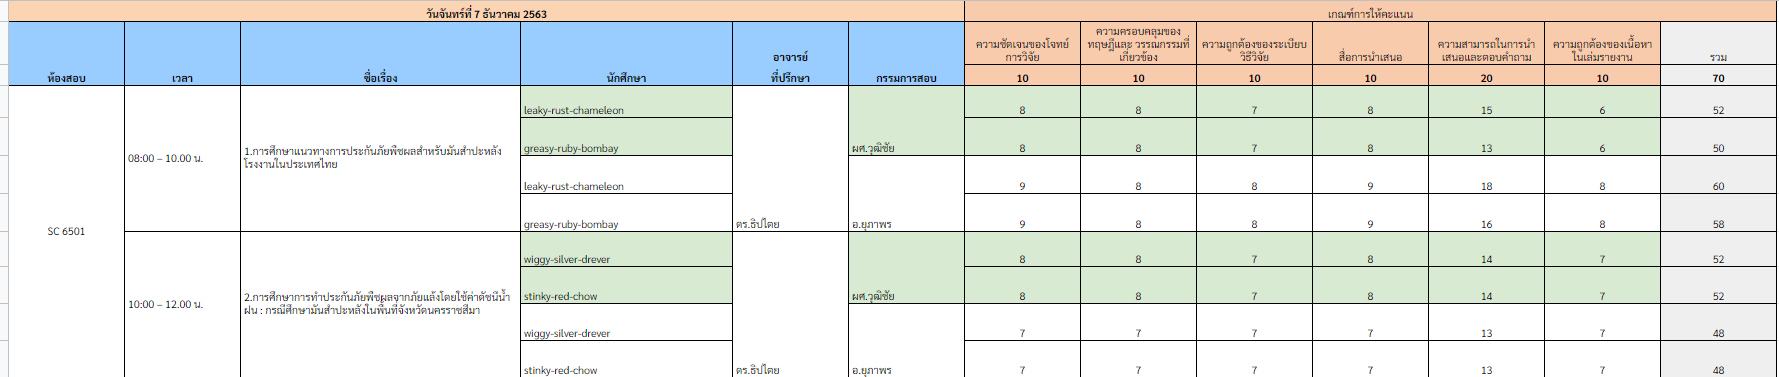

In [209]:
advisorr = pd.concat([tpt,tdd,sky,tnp,wtc,spn,ypp,plk,wcd,wnp,typ,utp] , axis=0)

In [210]:
advisorr.rename(columns = {'Unnamed: 0' : 'นักศึกษา'}, inplace = True)

In [211]:
advisor = advisorr[['นักศึกษา','คะแนนรวม 60%']] 

In [147]:
advisor

,นักศึกษา,คะแนนรวม 60%
1,leaky-rust-chameleon,58.285714
2,greasy-ruby-bombay,52.285714
3,wiggy-silver-drever,57.428571
4,stinky-red-chow,57.428571
5,bumpy-indigo-dolphin,57.428571
...,...,...
2,breezy-pear-macaw,59.142857
3,cozy-tangerine-ladybird,53.142857
4,scaly-pumpkin-monkey,53.142857
5,scanty-razzmatazz-rabbit,55.714286


# 2.รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน

คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)* 

In [257]:
import numpy as np

In [148]:
score = advisor.merge(day,left_on='นักศึกษา', right_on='นักศึกษา')
score

,นักศึกษา,คะแนนรวม 60%,คะแนนรวม 40%
0,leaky-rust-chameleon,58.285714,32.000000
1,greasy-ruby-bombay,52.285714,30.857143
2,wiggy-silver-drever,57.428571,28.571429
3,stinky-red-chow,57.428571,28.571429
4,bumpy-indigo-dolphin,57.428571,30.571429
...,...,...,...
75,breezy-pear-macaw,59.142857,32.000000
76,cozy-tangerine-ladybird,53.142857,29.714286
77,scaly-pumpkin-monkey,53.142857,29.714286
78,scanty-razzmatazz-rabbit,55.714286,28.857143


In [149]:
score['คะแนนรวม'] = (score['คะแนนรวม 60%']+score['คะแนนรวม 40%'])

In [254]:
score

,นักศึกษา,คะแนนรวม 60%,คะแนนรวม 40%,คะแนนรวม
0,leaky-rust-chameleon,58.285714,32.000000,90.285714
1,greasy-ruby-bombay,52.285714,30.857143,83.142857
2,wiggy-silver-drever,57.428571,28.571429,86.000000
3,stinky-red-chow,57.428571,28.571429,86.000000
4,bumpy-indigo-dolphin,57.428571,30.571429,88.000000
...,...,...,...,...
75,breezy-pear-macaw,59.142857,32.000000,91.142857
76,cozy-tangerine-ladybird,53.142857,29.714286,82.857143
77,scaly-pumpkin-monkey,53.142857,29.714286,82.857143
78,scanty-razzmatazz-rabbit,55.714286,28.857143,84.571429


ตัดเกรด

In [264]:
score['Grade'] = np.where((score.คะแนนรวม < 50),
                  'F', np.where((score.คะแนนรวม >= 50) & (score.คะแนนรวม <55),
                  'D', np.where((score.คะแนนรวม >= 55) & (score.คะแนนรวม <60),
                  'Dplus', np.where((score.คะแนนรวม >= 60)  & (score.คะแนนรวม <65), 
                  'C', np.where((score.คะแนนรวม >= 65) & (score.คะแนนรวม <70), 
                  'Cplus', np.where((score.คะแนนรวม >= 70) & (score.คะแนนรวม <75), 
                  'B', np.where((score.คะแนนรวม >= 75) & (score.คะแนนรวม <80), 
                  'Bplus', np.where((score.คะแนนรวม >= 80) & (score.คะแนนรวม <=100), 
                  'A', 'No Marks'))))))))
score

,นักศึกษา,คะแนนรวม 60%,คะแนนรวม 40%,คะแนนรวม,Grade
0,leaky-rust-chameleon,58.285714,32.000000,90.285714,A
1,greasy-ruby-bombay,52.285714,30.857143,83.142857,A
2,wiggy-silver-drever,57.428571,28.571429,86.000000,A
3,stinky-red-chow,57.428571,28.571429,86.000000,A
4,bumpy-indigo-dolphin,57.428571,30.571429,88.000000,A
...,...,...,...,...,...
75,breezy-pear-macaw,59.142857,32.000000,91.142857,A
76,cozy-tangerine-ladybird,53.142857,29.714286,82.857143,A
77,scaly-pumpkin-monkey,53.142857,29.714286,82.857143,A
78,scanty-razzmatazz-rabbit,55.714286,28.857143,84.571429,A


# 3.วาดกราฟ

- Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)
- Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
- Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา
*คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)*

##Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

In [247]:
import matplotlib.pyplot as plt

In [277]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[18,7]

In [226]:
คะแนนสอบปากเปล่า = dayy.groupby('นักศึกษา')['รวม'].mean().reset_index()
คะแนนสอบปากเปล่า = คะแนนสอบปากเปล่า.sort_values('รวม', ascending=False)
คะแนนสอบปากเปล่า

,นักศึกษา,รวม
52,randy-charcoal-flamingo,62.5
64,skinny-heliotrope-kudu,62.5
51,pokey-asparagus-frise,62.0
74,tasty-myrtle-ant,61.5
19,flabby-green-fish,61.0
...,...,...
29,greasy-eggplant-oyster,43.5
38,hazy-beige-stoat,43.0
70,squirrely-seashell-kingfisher,42.5
61,skanky-copper-affenpinscher,21.0


In [229]:
คะแนนส่วนที่ปรึกษา = advisorr[['นักศึกษา','รวม']].sort_values('รวม', ascending=False)
คะแนนส่วนที่ปรึกษา

,นักศึกษา,รวม
1,lumpy-carmine-slug,70.000000
7,skimpy-magenta-bombay,70.000000
2,breezy-pear-macaw,69.000000
7,flaky-sepia-setter,69.000000
8,pasty-tomato-okapi,69.000000
...,...,...
7,surly-linen-hyena,50.000000
6,squirrely-seashell-kingfisher,50.000000
5,hazy-beige-stoat,50.000000
3,greasy-eggplant-oyster,50.000000


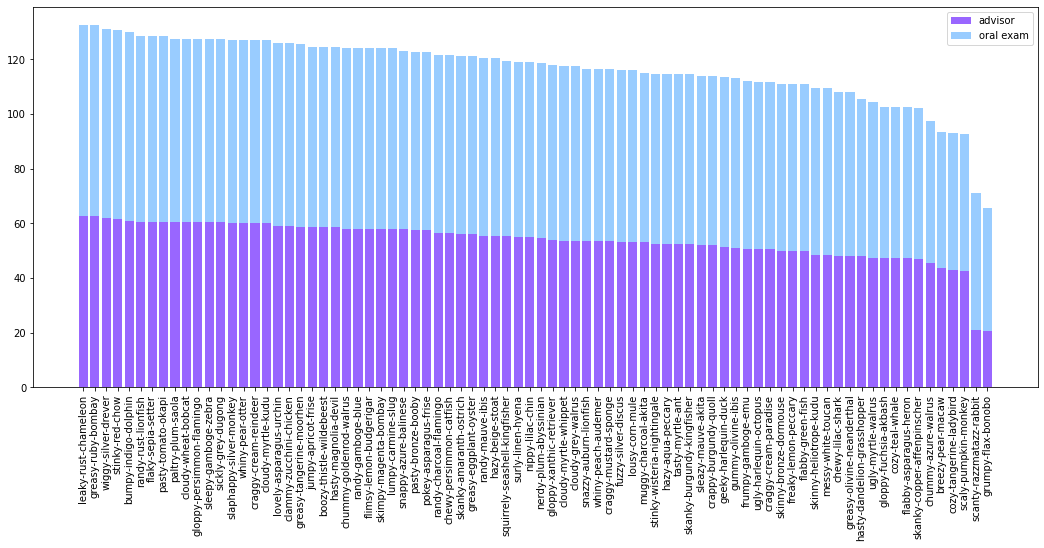

In [278]:
x = score['นักศึกษา']
y = คะแนนสอบปากเปล่า['รวม']
z = คะแนนส่วนที่ปรึกษา['รวม']

plt.bar(x, y, label ='advisor',color=['#9966FF'])
plt.bar(x, z, bottom=y, label ='oral exam',color=['#99CCFF'])
plt.xticks(score.reset_index()['นักศึกษา'],rotation=90)
plt.legend();

## Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

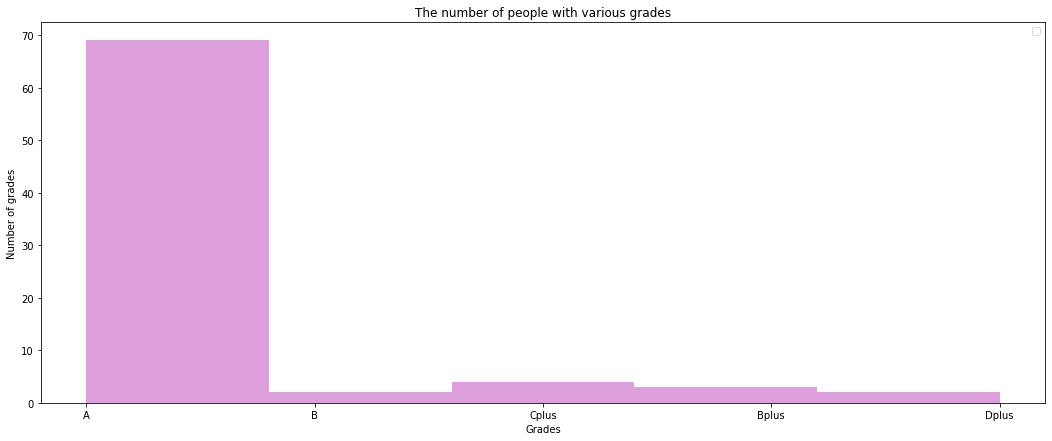

In [295]:
plt.hist(score['Grade'],bins=5,color = 'plum')
plt.title('The number of people with various grades')
plt.xlabel('Grades')
plt.ylabel('Number of grades')
plt.legend();

## Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

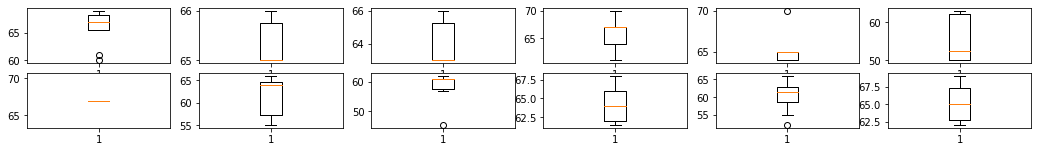

In [296]:
plt.subplot(6,6,1)
PA01 = plt.boxplot(tpt['รวม'])
plt.subplot(6,6,2)
PA02 = plt.boxplot(tdd['รวม'])
plt.subplot(6,6,3)
PA03 = plt.boxplot(sky['รวม'])
plt.subplot(6,6,4)
PA04 = plt.boxplot(tnp['รวม'])
plt.subplot(6,6,5)
PA05 = plt.boxplot(wtc['รวม'])
plt.subplot(6,6,6)
PA06 = plt.boxplot(spn['รวม'])
plt.subplot(6,6,7)
PA07 = plt.boxplot(ypp['รวม'])
plt.subplot(6,6,8)
PA08 = plt.boxplot(plk['รวม'])
plt.subplot(6,6,9)
PA09 = plt.boxplot(wcd['รวม'])
plt.subplot(6,6,10)
PA10 = plt.boxplot(wnp['รวม'])
plt.subplot(6,6,11)
PA11 = plt.boxplot(typ['รวม'])
plt.subplot(6,6,12)
PA12 = plt.boxplot(utp['รวม'])

# สมาชิกกลุ่ม
- ทิพเกษร ยอดคุณ 633020442-5
- ดุสดี เกิดปั้น 633020441-7
- ภัทรวดี นาดี 633021022-2